In [99]:
import cv2
import numpy as np
import pandas as pd
import random
import matplotlib.colors as mcolors
import sys
from IPython.display import Image, display

In [100]:
aruco = cv2.aruco
dictionary = aruco.getPredefinedDictionary(aruco.DICT_4X4_50)

In [101]:
cap = cv2.VideoCapture("src/mov/VibrationTest/t_hd_60.mp4")

if not (cap.isOpened()) :   # 正常に読み込めなかった場合終了する（VideoCaptureコンストラクタ自体は失敗してもFalseを返さないので注意）
    sys.exit()
fps = int(cap.get(cv2.CAP_PROP_FPS))
print("FPS: " + str(fps))
frameCount = 1
ret, img = cap.read()
h, w = img.shape[:2]


def imshow (img):
    imgInline = cv2.imencode('.jpg', img)[1]
    display(Image(imgInline))

FPS: 29


In [102]:
# 実験対象のフレームを画像に保存
# frame_want = np.arange(197, 199)
# for frame in frame_want:
#     cap.set(cv2.CAP_PROP_POS_FRAMES, frame)
#     ret, img = cap.read()
#     cv2.imwrite("./output/noisy_frames/test02_" + str(frame) + ".jpg", img)

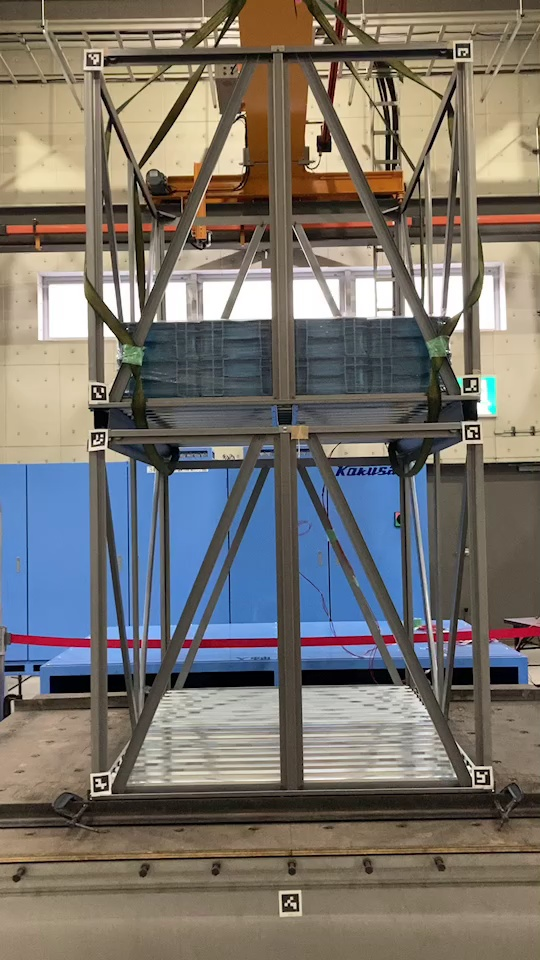

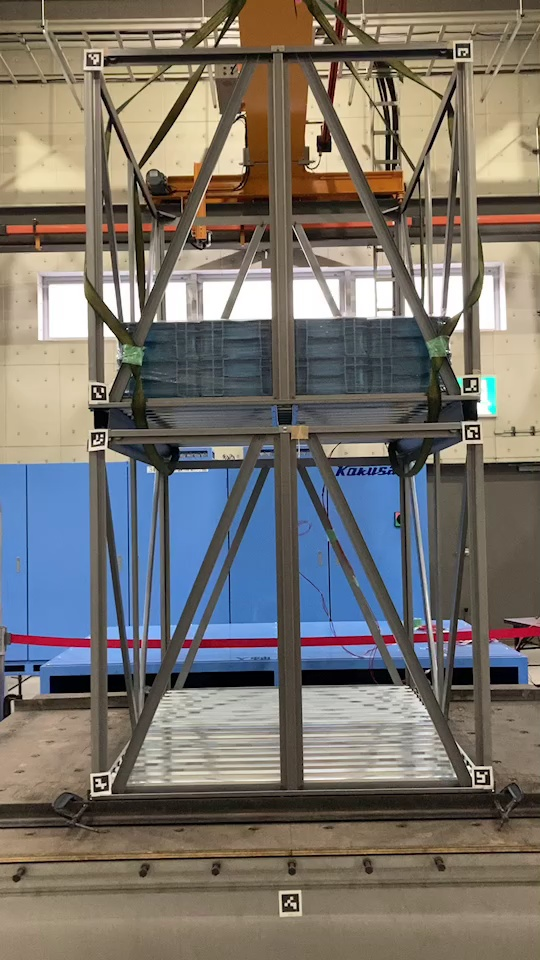

In [103]:
img_draw = img.copy()
imshow(img_draw)
corners_o, ids_o, rejectedImgPoints_o = aruco.detectMarkers(img_draw, dictionary)
aruco.drawDetectedMarkers(img_draw, corners_o, ids_o, (0, 255, 255))
imshow(img_draw)

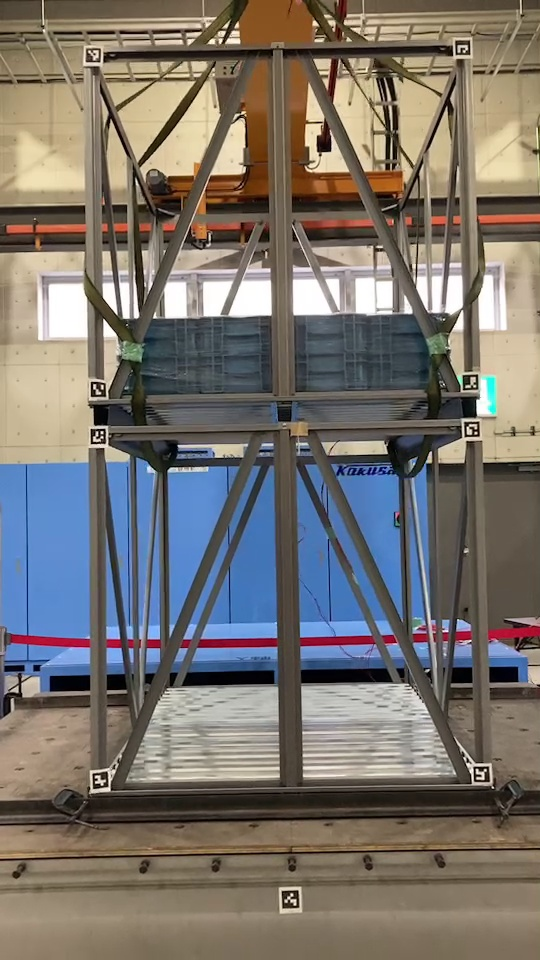

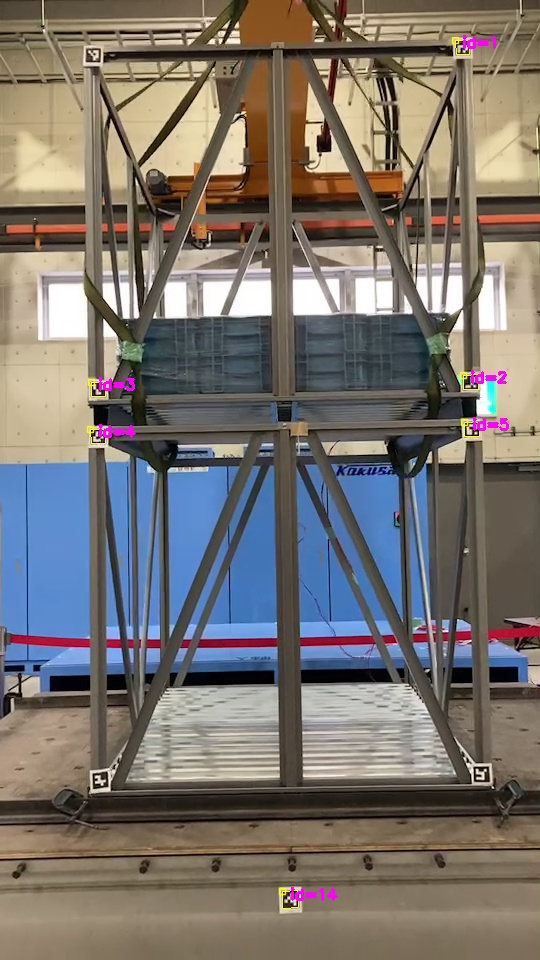

In [104]:
# img = cv2.imread("./output/noisy_frames/test02_199.jpg")
want_frame = 22
cap.set(cv2.CAP_PROP_POS_FRAMES, want_frame)
ret, img = cap.read()
if not ret:
    print("frame read error")
    sys.exit()

corners, ids, rejectedImgPoints = aruco.detectMarkers(img, dictionary)
img_draw = img.copy()
imshow(img_draw)
aruco.drawDetectedMarkers(img_draw, corners, ids, (0, 255, 255))
imshow(img_draw)

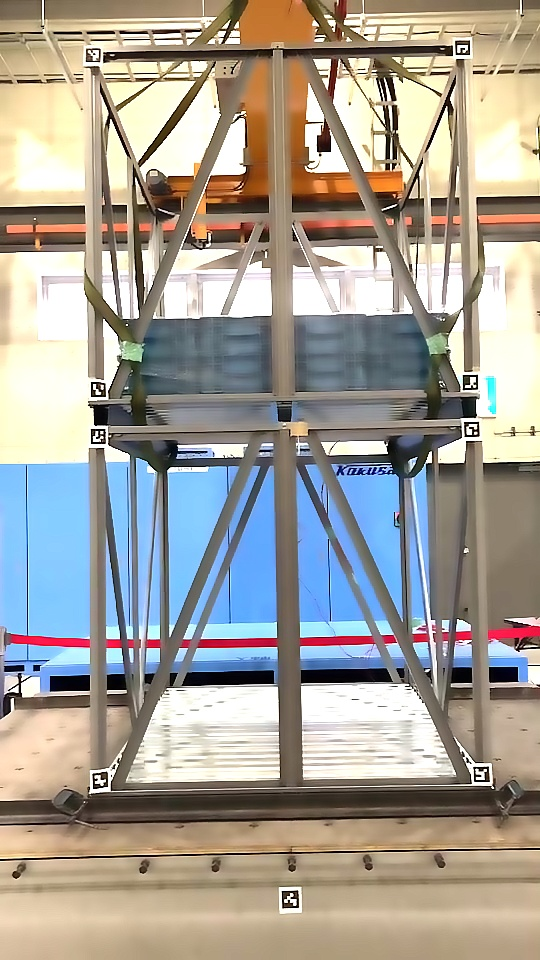

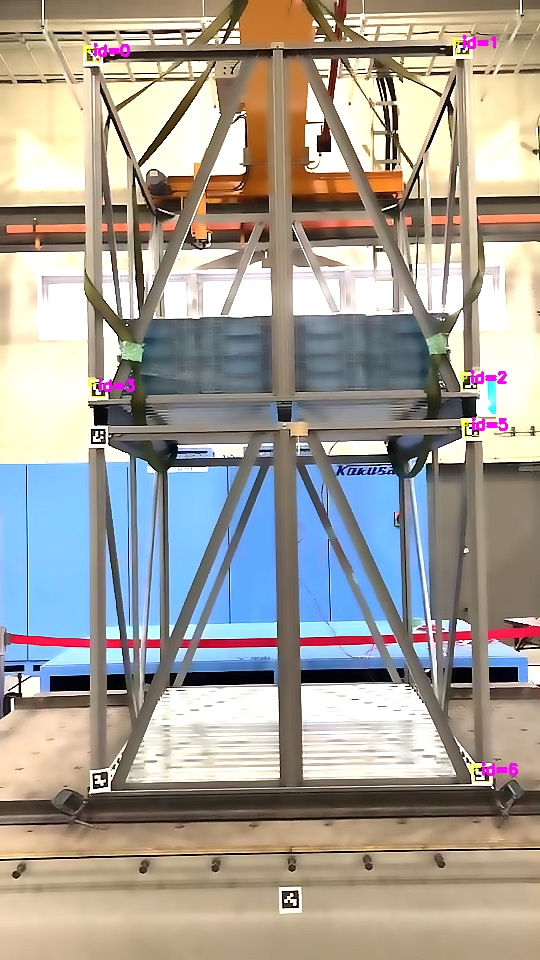

In [105]:
def make_sharp_kernel(k: int):
  return np.array([
    [-k / 9, -k / 9, -k / 9],
    [-k / 9, 1 + 8 * k / 9, k / 9],
    [-k / 9, -k / 9, -k / 9]
  ], np.float32)

kernel = make_sharp_kernel(2)
img_ga = cv2.GaussianBlur(img, (9, 9), 1)   # フィルターサイズは必ず奇数を与える


img_bltrl = cv2.bilateralFilter(src=img, d=10, sigmaColor=75, sigmaSpace=75)
img_sp = cv2.filter2D(img_bltrl, -1, kernel).astype("uint8")

img_for_detect = img_sp.copy()
imshow(img_for_detect)
corners_f, ids_f, rejectedImgPoints_f = aruco.detectMarkers(img_for_detect, dictionary)
aruco.drawDetectedMarkers(img_for_detect, corners_f, ids_f, (0, 255, 255))
imshow(img_for_detect)

In [106]:
list(zip(ids_f, corners_f))

[(array([6], dtype=int32),
  array([[[473., 767.],
          [488., 766.],
          [489., 781.],
          [474., 781.]]], dtype=float32)),
 (array([3], dtype=int32),
  array([[[ 91., 382.],
          [105., 384.],
          [105., 396.],
          [ 91., 396.]]], dtype=float32)),
 (array([2], dtype=int32),
  array([[[463., 375.],
          [477., 375.],
          [477., 389.],
          [462., 389.]]], dtype=float32)),
 (array([0], dtype=int32),
  array([[[ 86.,  48.],
          [100.,  49.],
          [ 99.,  61.],
          [ 86.,  61.]]], dtype=float32)),
 (array([1], dtype=int32),
  array([[[455.,  41.],
          [469.,  40.],
          [469.,  54.],
          [456.,  54.]]], dtype=float32)),
 (array([5], dtype=int32),
  array([[[464., 422.],
          [478., 422.],
          [479., 435.],
          [464., 436.]]], dtype=float32))]